In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [5]:
from torchvision import datasets, transforms


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

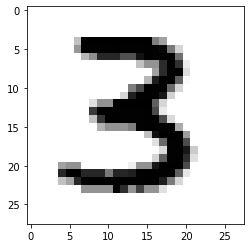

In [7]:
image, label = next(iter(trainloader))
plt.imshow(image[0][0],cmap = 'binary')

In [8]:
image.shape

torch.Size([64, 1, 28, 28])

In [9]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_one = nn.Linear(784,256)
        self.hidden_two = nn.Linear(256,128)
        self.hidden_three = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
    def forward(self,x):
        x = x.view((x.shape[0],-1))
        x = F.relu(self.hidden_one(x))
        x = F.relu(self.hidden_two(x))
        x = F.relu(self.hidden_three(x))
        x = F.log_softmax(self.output(x), dim = 1)
        
        return x
    

model = Network()

model

Network(
  (hidden_one): Linear(in_features=784, out_features=256, bias=True)
  (hidden_two): Linear(in_features=256, out_features=128, bias=True)
  (hidden_three): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
from torch import optim

epochs = 30
optimizer = optim.Adam(model.parameters(),lr = 0.003)
criterion = nn.NLLLoss(reduction = 'sum')
training_loss, testing_loss = [],[]

for i in range(epochs):
    total_train_loss = 0
    train_correct = 0
    for images,labels in trainloader:
        
        outputs = model(images)
        ps = torch.exp(outputs)
        
        optimizer.zero_grad()
        
        loss = criterion(outputs,labels)
        loss.backward()
        
        optimizer.step()
        total_train_loss += loss.item()
        
        top_p, top_class = ps.topk(1, dim = 1)
        match = top_class == labels.view(*top_class.shape)

        train_correct += match.sum().item()
                
    else:     
        
        # Figure out the testing loss and accuracy
        
        total_test_loss = 0
        test_correct = 0
        
        with torch.no_grad():
            
            for images, labels in testloader:
                outputs = model(images)
                ps = torch.exp(outputs)
                
                loss = criterion(outputs,labels)
                total_test_loss += loss.item()
                
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)

                test_correct += equals.sum().item()
                
    tr_loss = total_train_loss/len(trainloader.dataset)
    ts_loss = total_test_loss/len(testloader.dataset)
            
    training_loss.append(tr_loss)
    testing_loss.append(ts_loss)
    
    print('Train loss', tr_loss)
    print('Test loss',ts_loss)
    
    print('Train accuracy: ',train_correct/len(trainloader.dataset))
    print('Test accuracy: ',test_correct/len(testloader.dataset))
    

Train loss 0.33979578905304275
Test loss 0.22966057434082032
Train accuracy:  0.8914833333333333
Test accuracy:  0.9276
Train loss 0.17488484529654186
Test loss 0.15823965206742285
Train accuracy:  0.94615
Test accuracy:  0.9513
Train loss 0.1352201294451952
Test loss 0.12766546830534936
Train accuracy:  0.9587666666666667
Test accuracy:  0.9625
Train loss 0.12185001334349314
Test loss 0.11921310032219626
Train accuracy:  0.9629666666666666
Test accuracy:  0.9645
Train loss 0.10667367534736792
Test loss 0.15371821887493134
Train accuracy:  0.9673
Test accuracy:  0.955
Train loss 0.10210097614998619
Test loss 0.12338050402998925
Train accuracy:  0.969
Test accuracy:  0.9662
Train loss 0.08997865242560704
Test loss 0.13428797481060029
Train accuracy:  0.9733333333333334
Test accuracy:  0.9616
Train loss 0.0874436939480404
Test loss 0.13828982628583908
Train accuracy:  0.9731833333333333
Test accuracy:  0.963
Train loss 0.0812048518182089
Test loss 0.11155099392086268
Train accuracy:  0.9

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


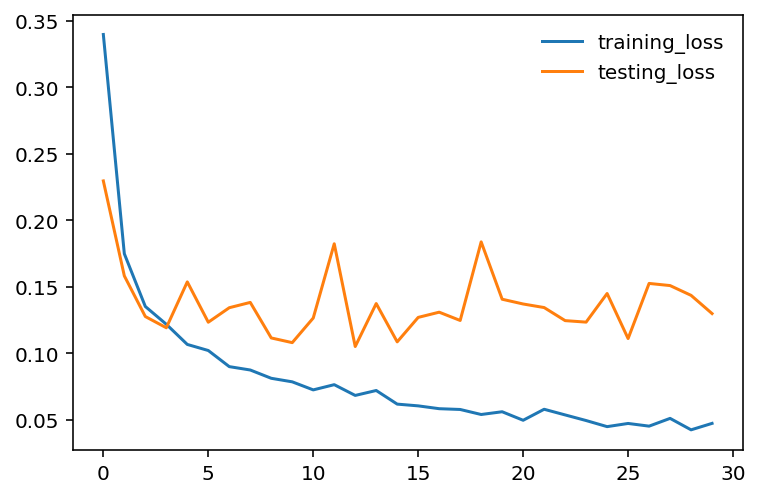

In [14]:
plt.plot(training_loss, label = 'training_loss')
plt.plot(testing_loss, label = 'testing_loss')
plt.legend(frameon = False)

In [15]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_one = nn.Linear(784,256)
        self.hidden_two = nn.Linear(256,128)
        self.hidden_three = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self,x):
        x = x.view((x.shape[0],-1))
        x = self.dropout(F.relu(self.hidden_one(x)))
        x = self.dropout(F.relu(self.hidden_two(x)))
        x = self.dropout(F.relu(self.hidden_three(x)))
        x = F.log_softmax(self.output(x), dim = 1)
        
        return x

model = Network()

epochs = 30
optimizer = optim.Adam(model.parameters(),lr = 0.003)
criterion = nn.NLLLoss(reduction = 'sum')
training_loss, testing_loss = [],[]

for i in range(epochs):
    total_train_loss = 0
    train_correct = 0
    for images,labels in trainloader:
        
        outputs = model(images)
        ps = torch.exp(outputs)
        
        optimizer.zero_grad()
        
        loss = criterion(outputs,labels)
        loss.backward()
        
        optimizer.step()
        total_train_loss += loss.item()
        
        top_p, top_class = ps.topk(1, dim = 1)
        match = top_class == labels.view(*top_class.shape)

        train_correct += match.sum().item()
                
    else:     
        
        # Figure out the testing loss and accuracy
        
        total_test_loss = 0
        test_correct = 0
        
        
        
        with torch.no_grad():
            model.eval()
            
            for images, labels in testloader:
                outputs = model(images)
                ps = torch.exp(outputs)
                
                loss = criterion(outputs,labels)
                total_test_loss += loss.item()
                
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)

                test_correct += equals.sum().item()
    
    # Set the model back into train mode by diabling dropouts
    model.train()
                
    tr_loss = total_train_loss/len(trainloader.dataset)
    ts_loss = total_test_loss/len(testloader.dataset)
            
    training_loss.append(tr_loss)
    testing_loss.append(ts_loss)
    
    print('Train loss', tr_loss)
    print('Test loss',ts_loss)
    
    print('Train accuracy: ',train_correct/len(trainloader.dataset))
    print('Test accuracy: ',test_correct/len(testloader.dataset))
        

Train loss 0.4626633457660675
Test loss 0.19733176812529563
Train accuracy:  0.8568
Test accuracy:  0.9415
Train loss 0.29356237255334855
Test loss 0.199530166554451
Train accuracy:  0.91455
Test accuracy:  0.9392
Train loss 0.2525555909136931
Test loss 0.16146734501123428
Train accuracy:  0.9277
Test accuracy:  0.9547
Train loss 0.23632571854194007
Test loss 0.14428504988253116
Train accuracy:  0.9321
Test accuracy:  0.9592
Train loss 0.22831145072976747
Test loss 0.15113206160664558
Train accuracy:  0.93565
Test accuracy:  0.9539
Train loss 0.2177398850361506
Test loss 0.12409132447838783
Train accuracy:  0.9391666666666667
Test accuracy:  0.965
Train loss 0.20529215066432954
Test loss 0.16422327237278223
Train accuracy:  0.9416666666666667
Test accuracy:  0.9528
Train loss 0.21178203537662824
Test loss 0.13933656243085862
Train accuracy:  0.9414
Test accuracy:  0.9612
Train loss 0.20260339420338472
Test loss 0.12094347011446953
Train accuracy:  0.9445
Test accuracy:  0.9653
Train lo

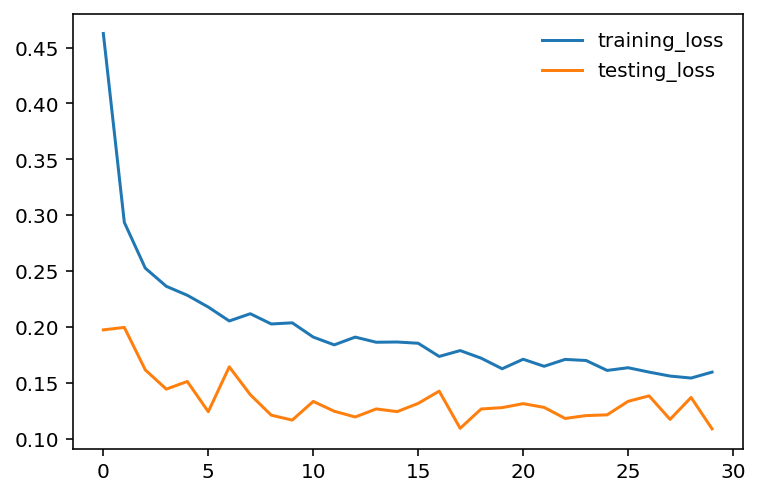

In [16]:
plt.plot(training_loss, label = 'training_loss')
plt.plot(testing_loss, label = 'testing_loss')
plt.legend(frameon = False)